### 1.Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
from ydata_profiling import ProfileReport

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

### 2.Importing the data

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

Important info in this data set for a churn progrm:
Customer Lifetime value
Coverage
Monthly Premium Auto (the amount you pay — either every month, every six months or annually — for car insurance coverage


### 3.First, look at its main features (head, shape, info).

In [3]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [6]:
data['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [7]:
eda_report = ProfileReport(data, title = "EDA_Report_customer_value_analysis")
eda_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.Rename the columns so they follow the PE8 (snake case).

In [8]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

### 5.Fix the data types of any other column/columns as you might see necessary. 
#### Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

In [9]:
print(data.dtypes)

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object


In [10]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [11]:
print(data.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6.Plot a correlation matrix, and comment on what you observe.

In [12]:
corr_matrix = data.corr()

<AxesSubplot:>

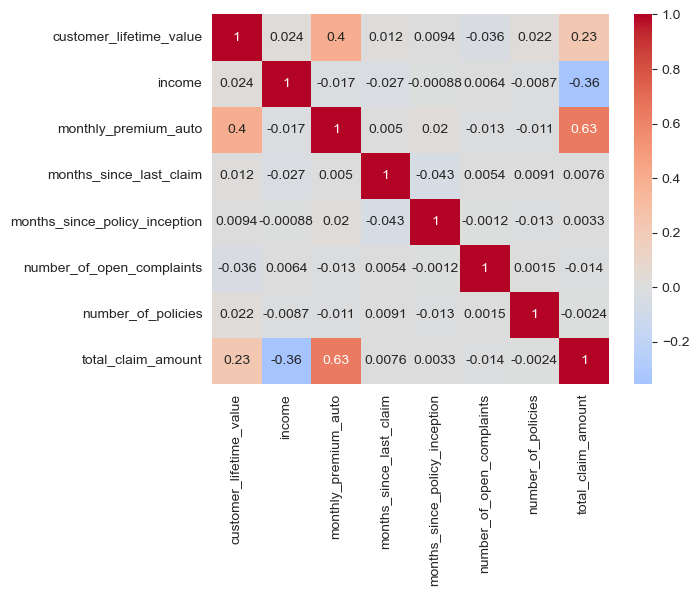

In [14]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, center=0)

We observe a relatively high positive correlation between monthly premium auto and total claim amount but it is not to high that cause multicollinearity I guess.

### 7.Plot every continuous variable. Comment what you can see in the plots.


In [17]:
numerical = data.select_dtypes([np.number])

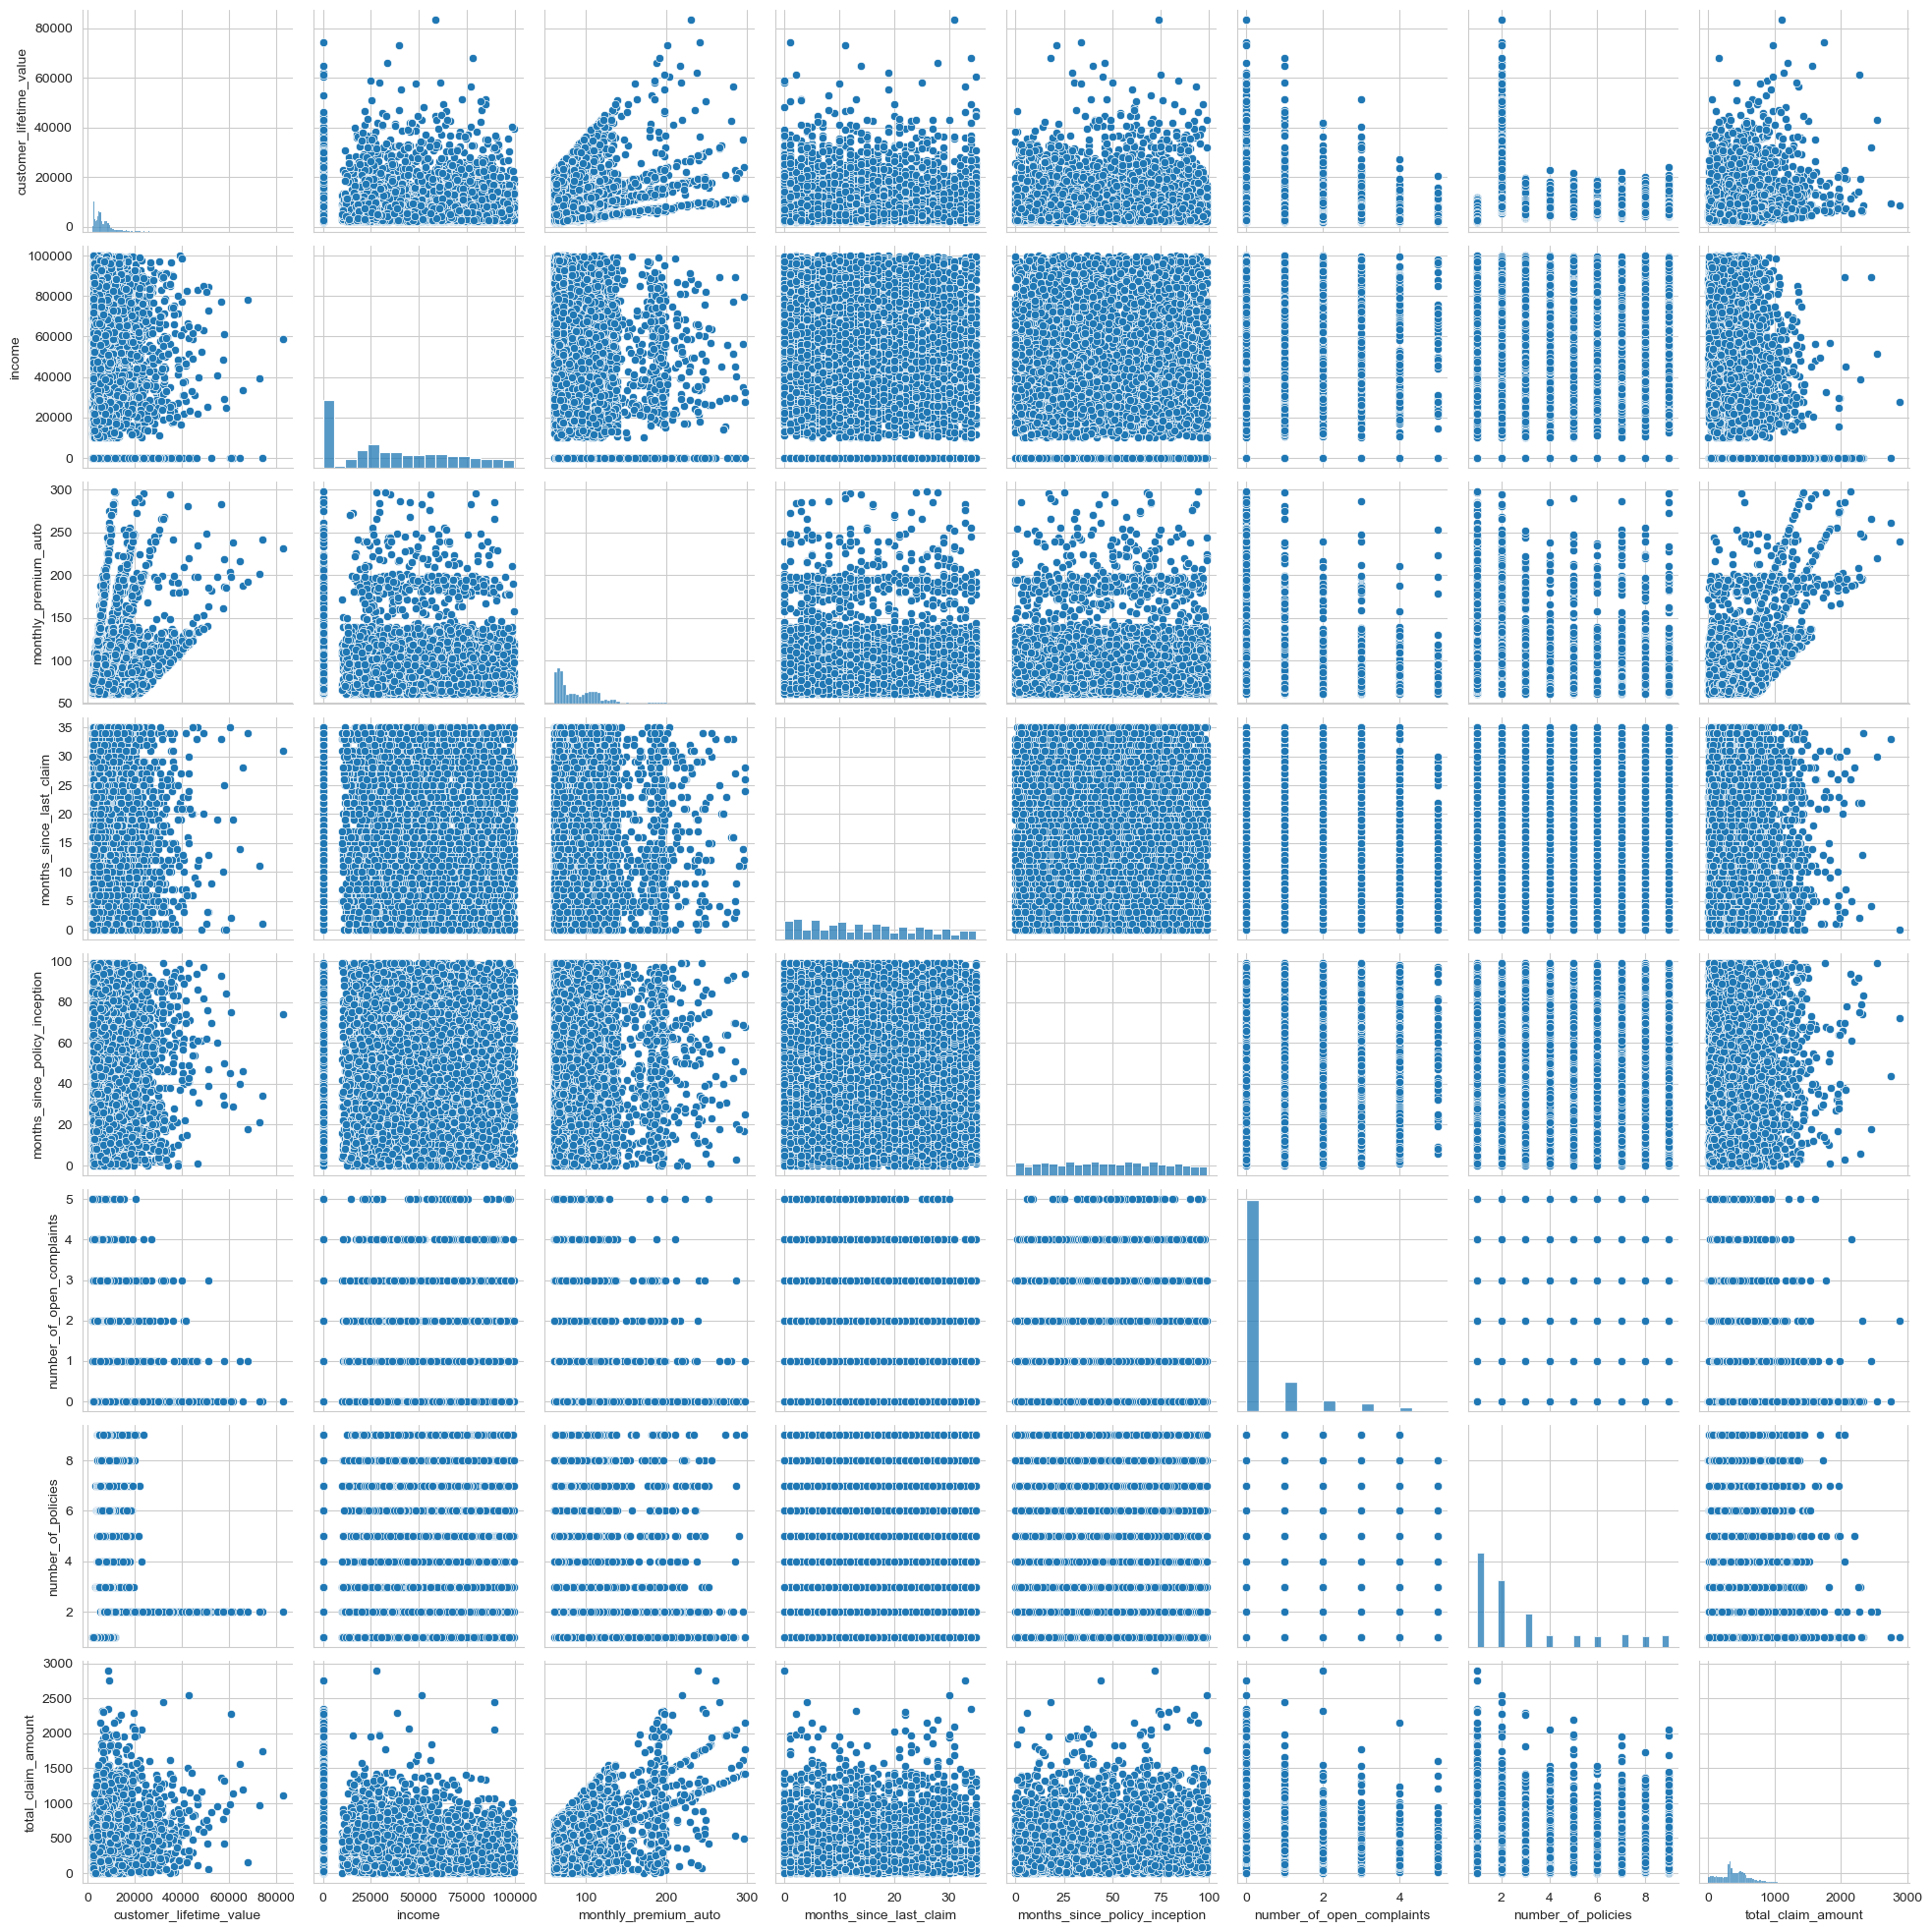

In [18]:
sns.pairplot(numerical)
plt.show()

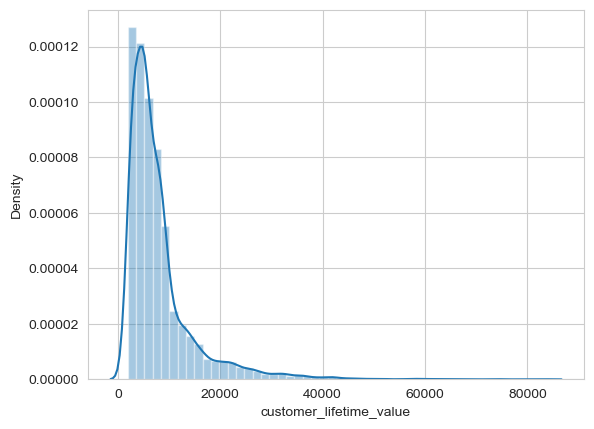

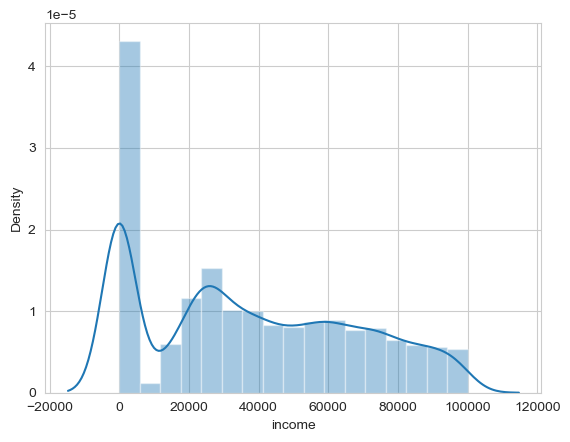

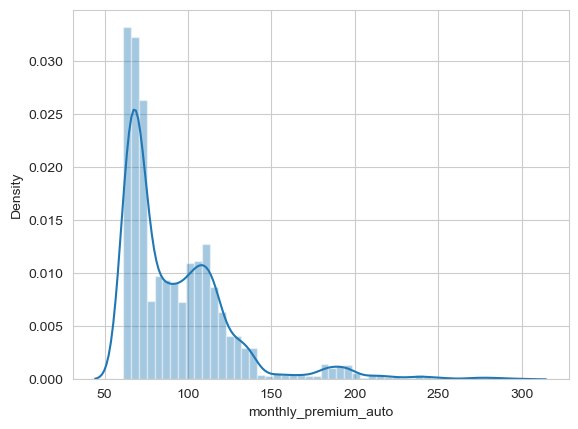

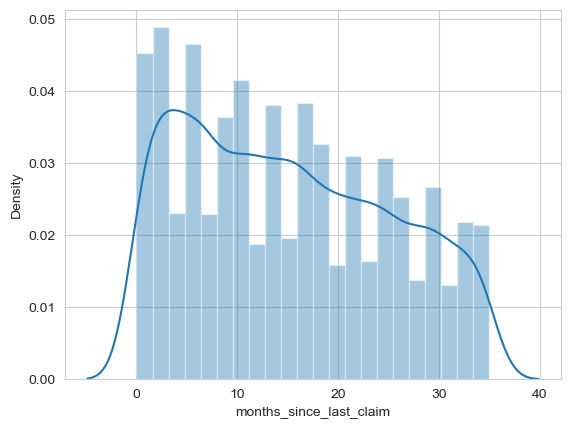

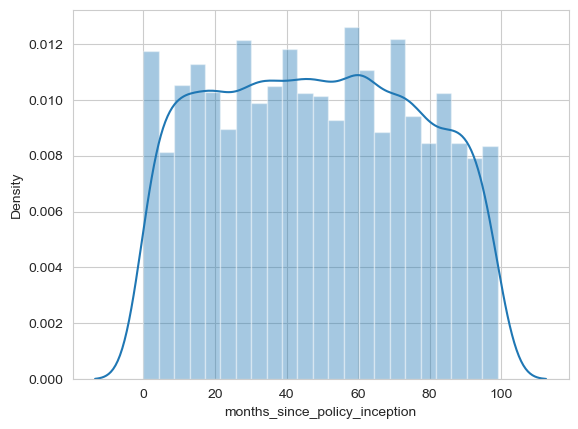

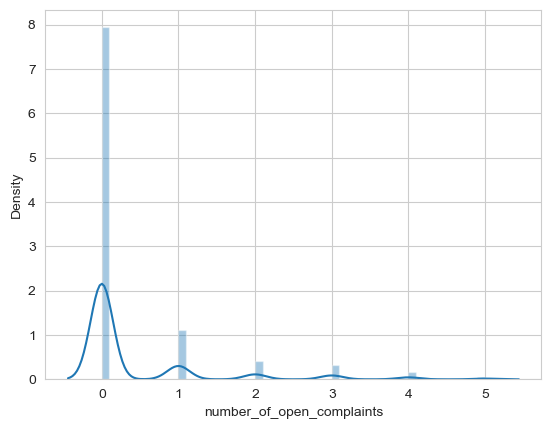

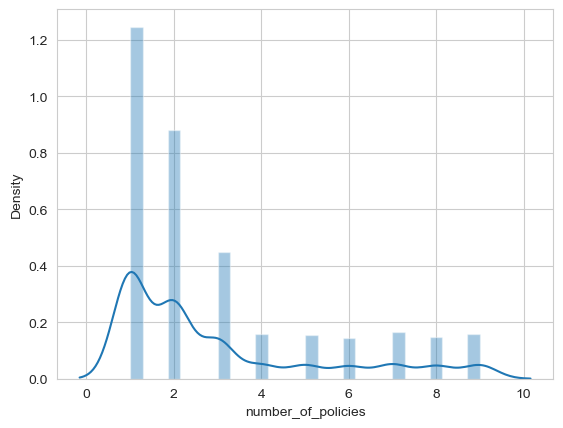

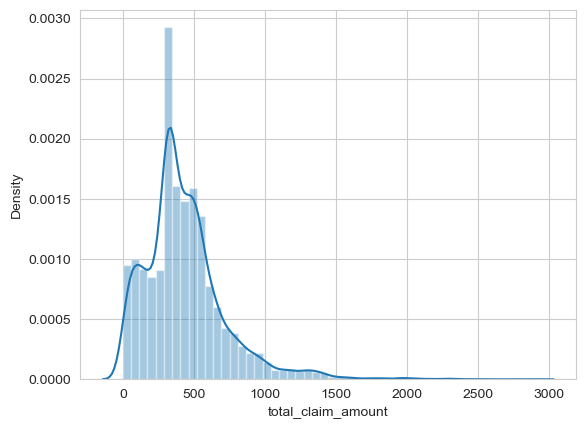

In [19]:
for column in numerical.columns:
    sns.distplot(numerical[column])

    plt.show()

In [26]:
data['customer_lifetime_value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [27]:
data['income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [30]:
data['monthly_premium_auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: monthly_premium_auto, dtype: float64

In [31]:
data['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

#### Customer lifetime value is bit skewed to the right, this suggests that there may be a few customers with exceptionally high lifetime values, while the majority of customers have lower lifetime values. 

#### Income, monthly_premium_auto and total_claim_amount are also skewed to right.

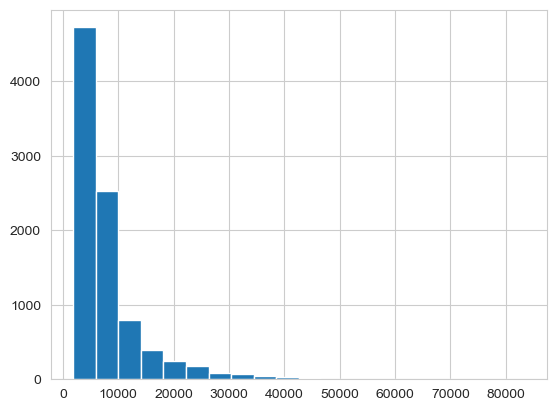

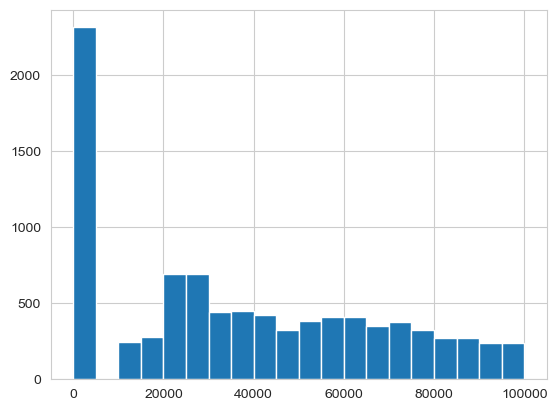

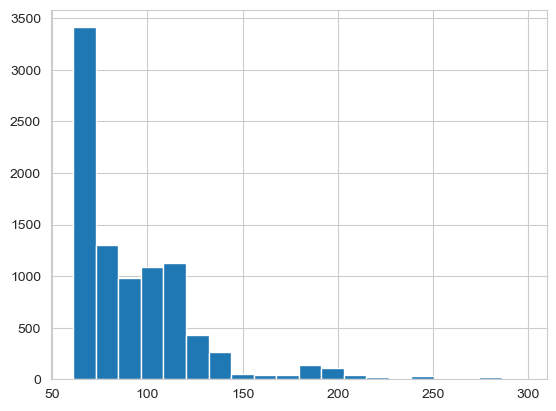

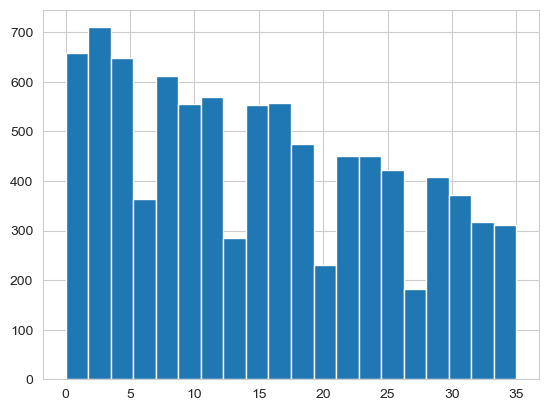

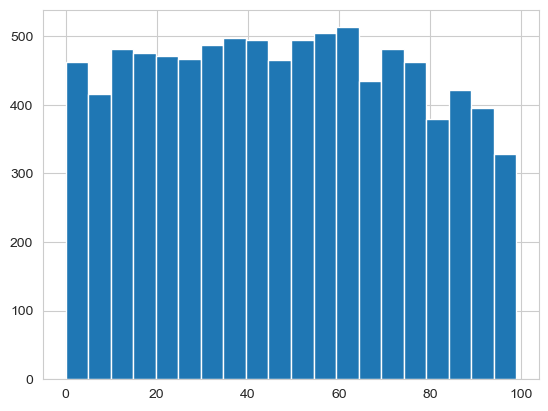

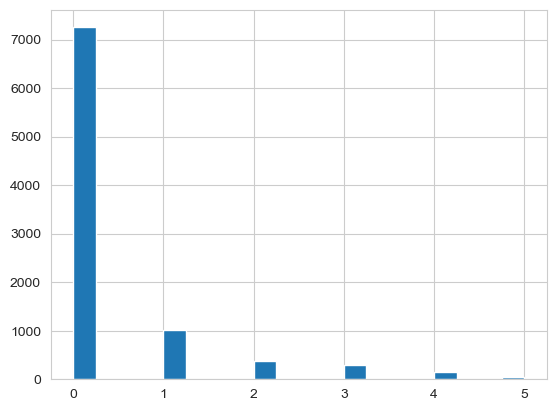

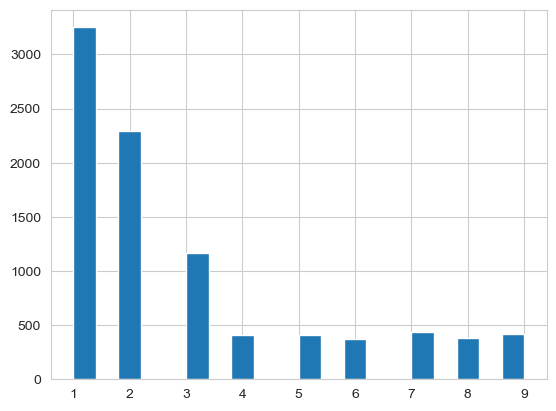

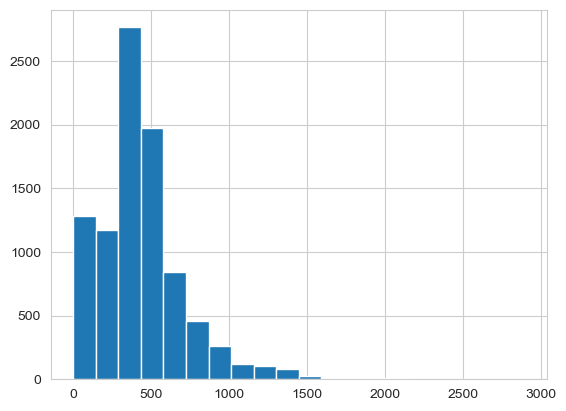

In [20]:
for column in numerical.columns:
    numerical[column].hist(bins=20)

    plt.show()

### 8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). 

Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [40]:
categorical= data.select_dtypes([np.object])
categorical.head(2)

customer       state response  coverage education employmentstatus gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize

<font color=green>Creating a bar plot for a customer ID column would result in a plot with only one bar per customer, which doesn't provide any meaningful insight.</font>


In [49]:
categorical_wo_id=categorical.drop('customer', axis=1)
categorical_wo_id.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

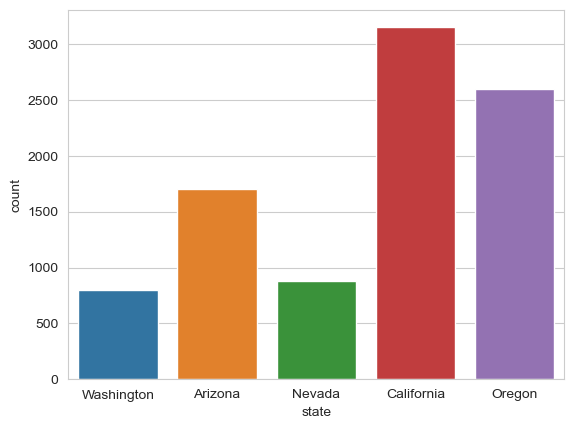

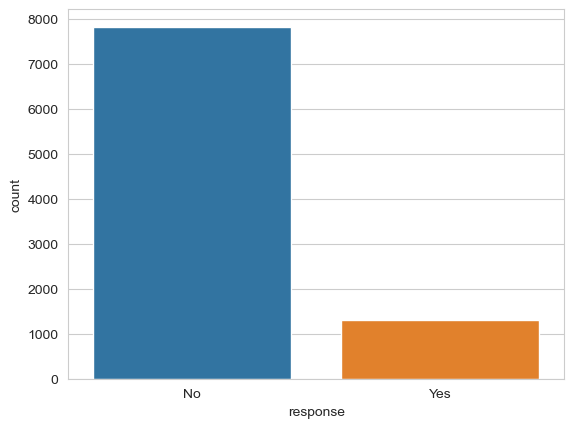

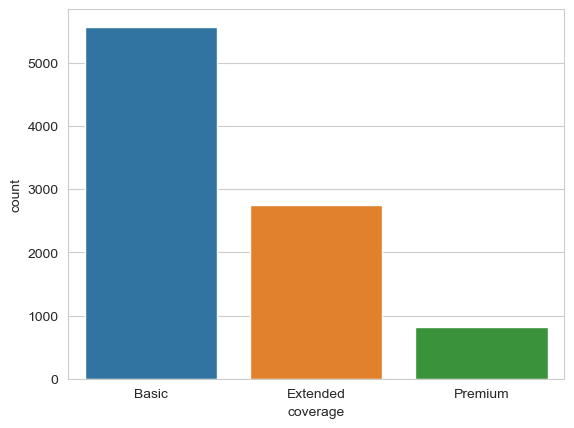

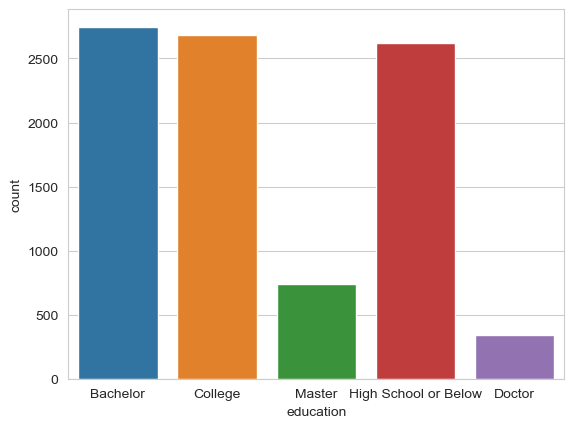

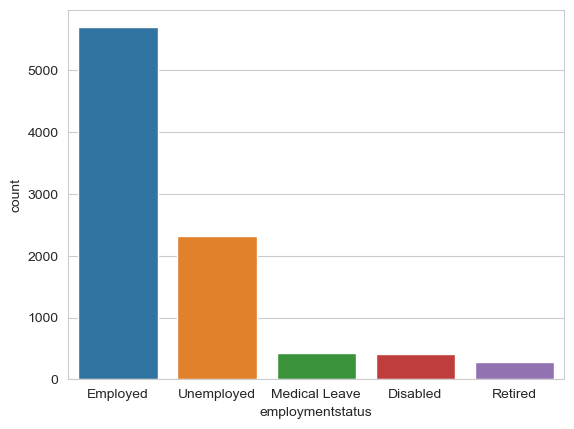

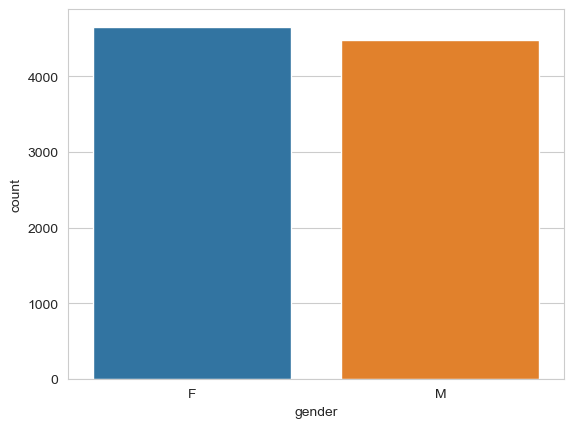

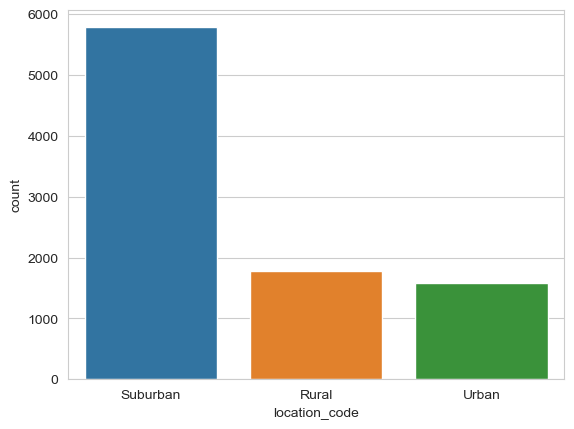

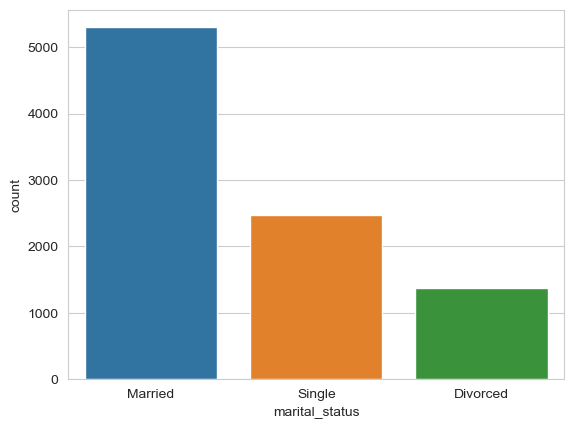

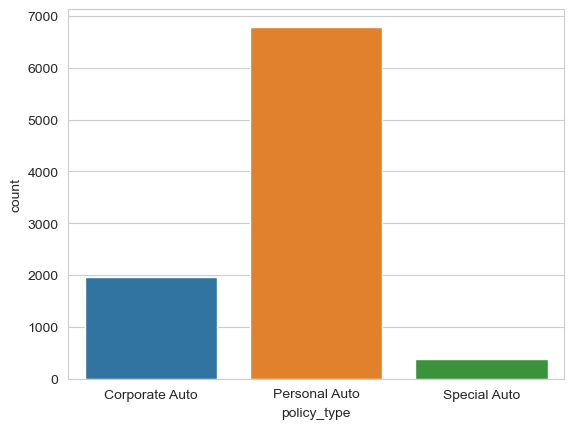

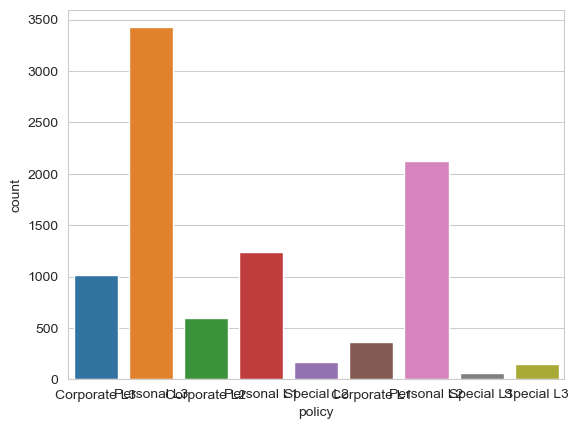

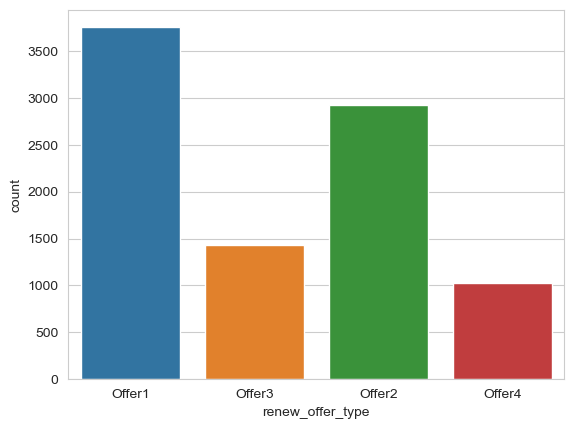

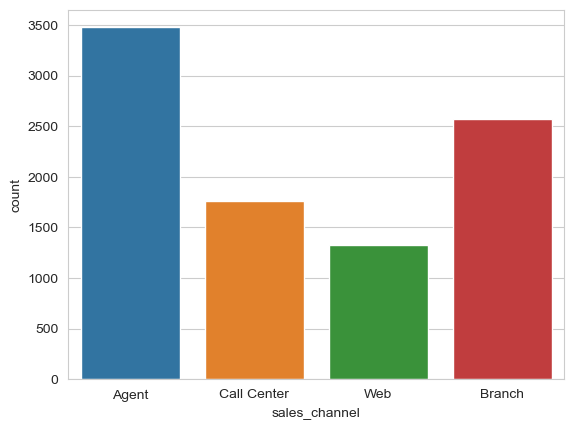

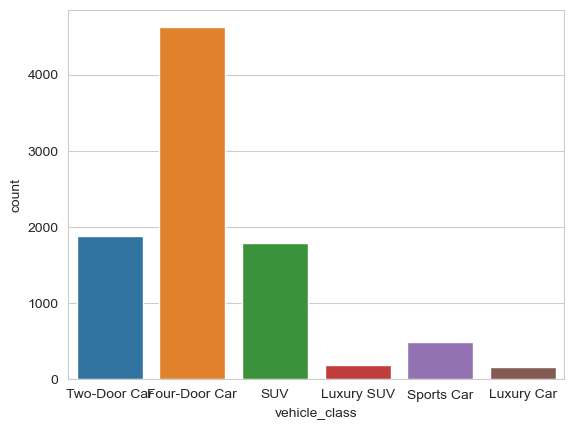

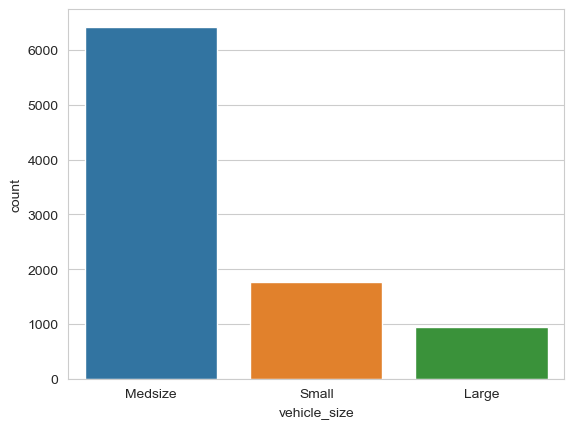

In [51]:
for col in categorical_wo_id.columns:
    sns.countplot(x=col, data=categorical_wo_id)
    
    plt.show()

<font color=blue>*sns.countplot() is a function provided by the Seaborn library in Python for creating bar plots to display the counts of unique values in a categorical column of a DataFrame. It is a specialized plot for visualizing the distribution of categorical data and is particularly useful for examining the frequency of occurrence of different categories in a dataset.*</font> 

### 9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

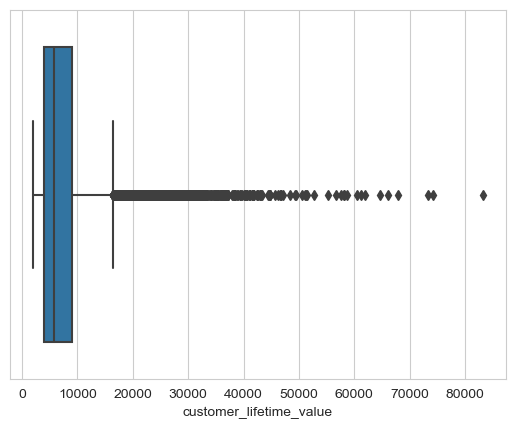

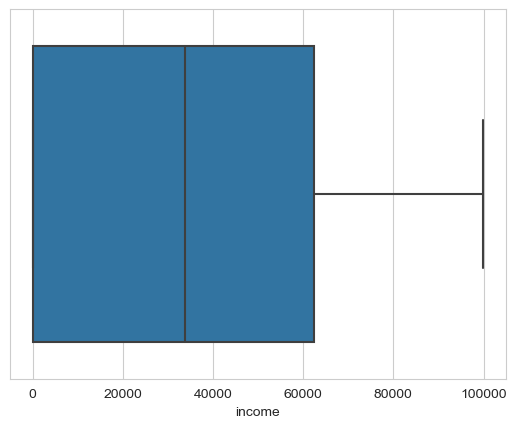

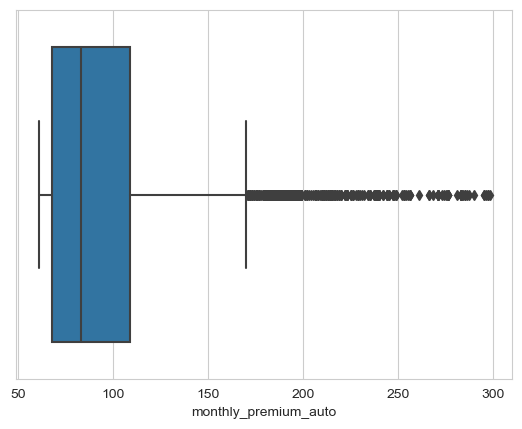

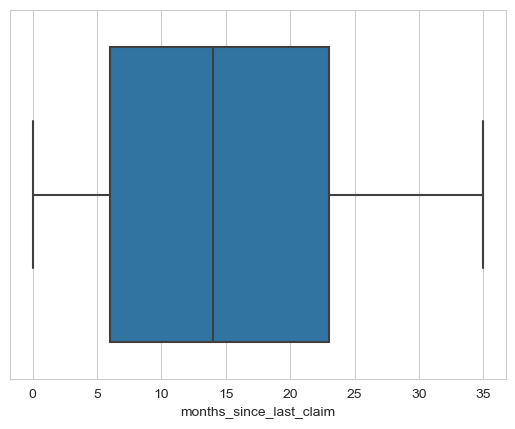

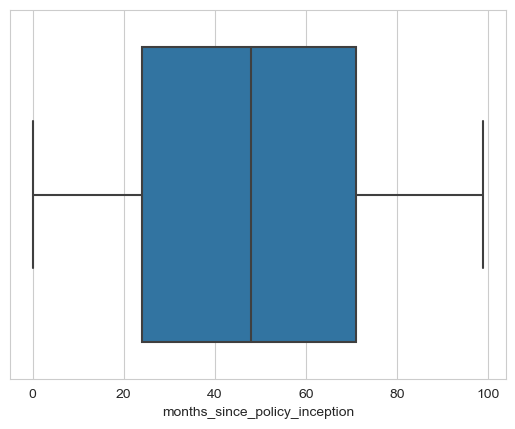

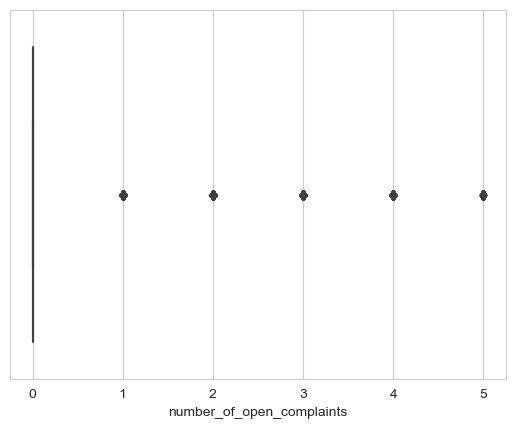

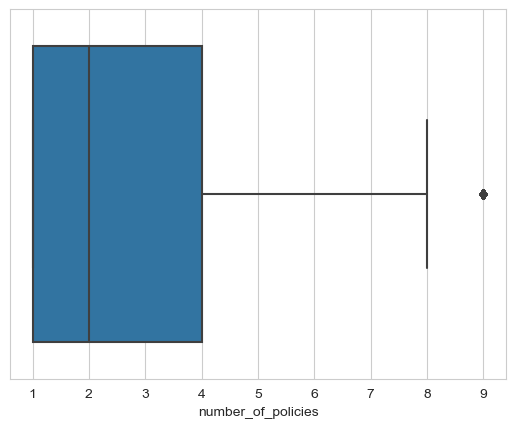

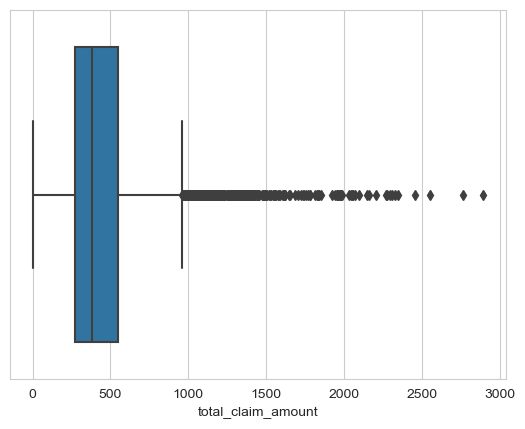

In [54]:
for column in numerical.columns:
    sns.boxplot(x=numerical[column])

    plt.show()

There are values in customer_lifetime_value that can be considered outliers but I will not remove them because in this case it shows customers with very high values that the business should make sure to keep. I think the same applies to the monthly premium value and total claim amount.

### 10.Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [57]:
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

<font color=green>There are no null values in the data frame.</font>

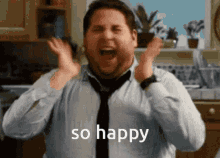